In [46]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy

import matplotlib.pyplot as plt

In [3]:
train = pd.read_csv('./LP-IV-datasets/CIFR/train_data.csv')
test = pd.read_csv('./LP-IV-datasets/CIFR/test_data.csv')

In [4]:
train

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,59,62,63,43,46,45,50,48,43,68,...,216,184,140,151,118,84,123,92,72,6
1,154,177,187,126,137,136,105,104,95,102,...,143,133,139,143,134,142,143,133,144,9
2,255,255,255,253,253,253,253,253,253,253,...,78,85,83,79,85,83,80,86,84,9
3,28,25,10,37,34,19,38,35,20,42,...,54,47,28,63,56,37,72,65,46,4
4,170,180,198,168,178,196,177,185,203,183,...,75,79,82,71,75,78,73,77,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,145,161,194,151,166,199,156,171,205,155,...,39,41,56,36,38,53,37,39,54,2
49996,255,245,132,254,247,134,255,249,137,254,...,249,174,79,252,181,81,253,181,76,6
49997,35,178,235,40,176,239,42,176,241,39,...,27,52,77,21,43,66,12,31,50,9
49998,189,211,240,186,208,236,185,207,235,184,...,195,184,169,196,189,171,195,190,171,1


In [5]:
test

,pixel_0,pixel_1,pixel_2,pixel_3,pixel_4,pixel_5,pixel_6,pixel_7,pixel_8,pixel_9,...,pixel_3063,pixel_3064,pixel_3065,pixel_3066,pixel_3067,pixel_3068,pixel_3069,pixel_3070,pixel_3071,label
0,158,112,49,159,111,47,165,116,51,166,...,24,77,124,34,84,129,21,67,110,3
1,235,235,235,231,231,231,232,232,232,232,...,168,183,178,180,195,191,186,200,199,8
2,158,190,222,158,187,218,139,166,194,132,...,5,6,8,4,5,3,7,8,7,8
3,155,156,149,167,176,187,176,179,193,190,...,60,63,50,64,65,52,73,68,50,0
4,65,68,50,70,81,64,48,64,46,30,...,143,179,136,154,185,146,128,156,117,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,76,78,133,76,78,134,77,80,132,76,...,204,219,236,200,215,234,199,216,236,8
9996,81,57,43,91,69,53,98,75,63,106,...,155,139,129,171,167,147,167,164,160,3
9997,20,15,12,19,14,11,15,14,11,15,...,24,23,50,26,23,53,25,20,47,5
9998,25,40,12,15,36,3,23,41,18,17,...,93,124,80,95,123,81,92,120,80,1


In [9]:
x_train = train.drop(['label'], axis = 1).values
y_train = train['label'].values

In [10]:
x_test = test.drop(['label'], axis = 1).values
y_test = test['label'].values

In [13]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

In [17]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [19]:
x_train = x_train.reshape((50000, 32, 32, 3))
x_test = x_test.reshape((10000, 32, 32, 3))

In [40]:
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape = (32, 32, 3), activation = 'relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten()) 
model.add(Dense(64, activation = 'relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation = 'softmax'))

model.compile(optimizer = 'adam', metrics = ['accuracy'], loss = SparseCategoricalCrossentropy())
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 7200)              0         
                                                                 
 dense_13 (Dense)            (None, 64)                460864    
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                     

In [42]:
finalModel = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 2)

Epoch 1/2
1563/1563 [==============================] - 6s 4ms/step - loss: 1.9041 - accuracy: 0.3160 - val_loss: 1.7990 - val_accuracy: 0.3634
Epoch 2/2
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8253 - accuracy: 0.3446 - val_loss: 1.7379 - val_accuracy: 0.3801


In [45]:
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 1.7379 - accuracy: 0.3801


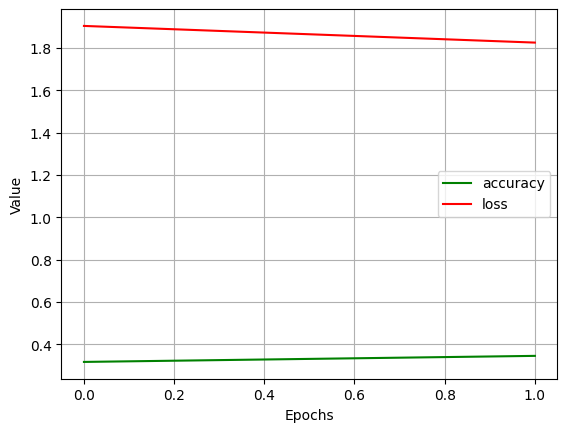

In [56]:
plt.plot(finalModel.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(finalModel.history['loss'], label = 'loss', color = 'red')
plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Value')

plt.show()

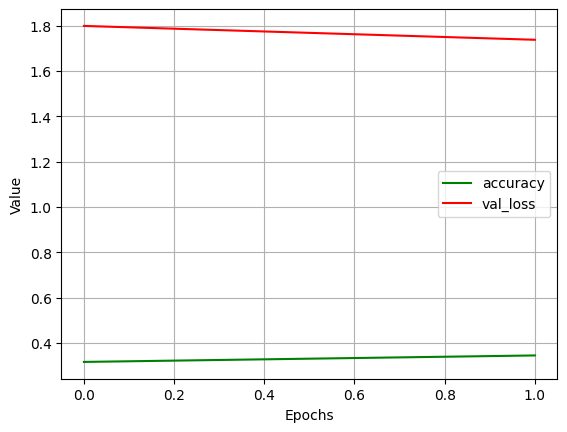

In [57]:
plt.plot(finalModel.history['accuracy'], label = 'accuracy', color = 'green')
plt.plot(finalModel.history['val_loss'], label = 'val_loss', color = 'red')
plt.legend()
plt.grid()

plt.xlabel('Epochs')
plt.ylabel('Value')

plt.show()